In [22]:
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.grid_search import GridSearchCV

//anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:4: DeprecationWarning: sklearn.metrics.metrics is deprecated and will be removed in 0.18. Please import from sklearn.metrics
  DeprecationWarning)


Multinomial Logit
Basically we have more than two(binomial) outcomes or classes. Let's look at recent San Francisco data set

In [23]:
# prep data, covert date to datetime, split for train and test, and build model
sf_crime = pd.read_csv('../../assets/datasets/sf_crime_train.csv')
sf_crime = sf_crime.dropna(inplace=True)
# sf_crime.describes()

# sf_crime.describe(include='all')

In [24]:
# prep data, covert date to datetime, split for train and test, and build model
sf_crime = pd.read_csv('../../assets/datasets/sf_crime_train.csv')

sf_crime = sf_crime.dropna()

sf_crime['Dates'] = pd.to_datetime(sf_crime.Dates)
sf_crime_dates = pd.DatetimeIndex(sf_crime.Dates.values, dtype='datetime64[ns]', freq=None)

sf_crime['hour'] = sf_crime_dates.hour
sf_crime['month'] = sf_crime_dates.month
sf_crime['year'] = sf_crime_dates.year

In [25]:
sf_crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,month,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015


In [41]:
sf_crime.describe(include = 'all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,hour,month,year
count,18000,18000,18000,18000,18000,18000,18000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
unique,7855,36,510,7,10,10,6381,NaN,NaN,NaN,NaN,NaN
top,2015-02-20 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN
freq,25,4885,2127,2930,3287,12862,402,NaN,NaN,NaN,NaN,NaN
first,2015-02-17 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.423639,37.768466,13.646833,3.489944,2015.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026532,0.024391,6.539098,0.868601,0.537351
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.708154,0.000000,2.000000,2015.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.434199,37.753838,10.000000,3.000000,2015.000000


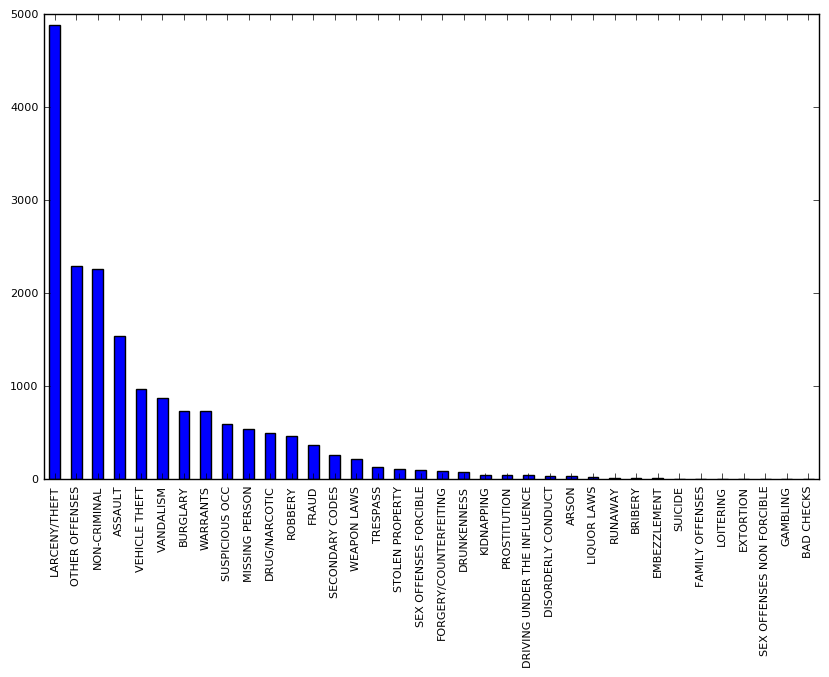

In [42]:
sf_crime['Category'].value_counts().plot(kind ='bar',figsize = (10,6))
plt.show()

In [26]:
sf_crime.DayOfWeek.value_counts()

Wednesday    2930
Friday       2733
Saturday     2556
Thursday     2479
Sunday       2456
Monday       2447
Tuesday      2399
Name: DayOfWeek, dtype: int64

In [27]:
sf_crime.Category.value_counts()

LARCENY/THEFT                  4885
OTHER OFFENSES                 2291
NON-CRIMINAL                   2255
ASSAULT                        1538
VEHICLE THEFT                   967
VANDALISM                       877
BURGLARY                        732
WARRANTS                        728
SUSPICIOUS OCC                  592
MISSING PERSON                  535
DRUG/NARCOTIC                   496
ROBBERY                         465
FRAUD                           363
SECONDARY CODES                 261
WEAPON LAWS                     212
TRESPASS                        131
STOLEN PROPERTY                 111
SEX OFFENSES FORCIBLE           103
FORGERY/COUNTERFEITING           85
DRUNKENNESS                      74
KIDNAPPING                       50
PROSTITUTION                     44
DRIVING UNDER THE INFLUENCE      42
DISORDERLY CONDUCT               37
ARSON                            35
LIQUOR LAWS                      25
RUNAWAY                          16
BRIBERY                     

In [28]:
sf_crime.Category.value_counts().plot(kind='bar')

Setting Thresholds for binary Classes Let's rebuild our target to have two classes, and review how to optimize thresholds

In [29]:
subset = ['ASSAULT','VANDALISM'] #(1)
sf_crime_sub = sf_crime[sf_crime['Category'].str.contains('|'.join(subset))]

#sf_sample = sf_crime_sub.sample(frac=0.50)


X = patsy.dmatrix('~ C(hour) + C(DayOfWeek) + C(PdDistrict) + X + Y', sf_crime_sub) # To get dummies
Y = sf_crime_sub.Category.values
# split for train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=5)

In [30]:
# fit model with five folds and lasso regularization
# lassolm = linear_model.lasso().fit(X_train, Y_train)
# modeln= lassolm
# predictions = model.predict(X_sub)

clf = LogisticRegressionCV(cv = 5, scoring ='accuracy') #(1)
clf.fit(X_train,Y_train)
# use Cs=15 to test a grid of 15 distinct parameters
# remember: Cs describes the inverse of regularization strength
#logreg_cv = LogisticRegressionCV(solver='liblinear') # update inputs here



LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0)

In [31]:
Ypred = clf.predict(X_test) #(1)

conmat = confusion_matrix(Y_test, Ypred, labels=clf.classes_)
pd.DataFrame(conmat, columns=clf.classes_, index=clf.classes_)

,ASSAULT,VANDALISM
ASSAULT,457,51
VANDALISM,235,54


In [32]:
#print classification reports (1)
print(classification_report(Y_test,Ypred))

             precision    recall  f1-score   support

    ASSAULT       0.66      0.90      0.76       508
  VANDALISM       0.51      0.19      0.27       289

avg / total       0.61      0.64      0.58       797



In [33]:
y_score = clf.fit(X_train, Y_train).decision_function(X_test) #(1)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_score, pos_label='VANDALISM')

In [34]:
np.round(y_score,2)

array([-0.67,  0.19, -1.13, -1.1 , -0.25, -1.28,  0.23, -0.54, -0.41,
       -0.15, -1.33,  0.18, -0.75, -0.74,  0.31, -1.15, -0.69, -0.67,
       -0.26, -0.56, -0.37,  0.22, -1.17, -0.34, -0.99, -1.27, -1.58,
       -1.11, -0.22, -1.12, -1.53, -0.64, -1.31, -0.86, -0.18, -1.14,
       -0.28, -0.45, -0.17, -1.02, -1.19, -0.45, -1.49, -0.15,  0.12,
       -1.48,  0.06, -0.52, -0.28, -1.34,  0.02, -0.63,  0.09, -0.62,
       -1.06, -0.95, -0.66, -1.14, -0.36,  0.  , -1.64,  0.37, -0.56,
       -0.66, -0.86, -1.1 , -0.85, -0.84, -1.1 , -0.34, -0.39, -1.65,
       -0.6 ,  0.05, -0.86,  0.02, -0.7 , -0.19, -0.47, -0.33, -1.04,
       -0.79, -0.56, -0.05, -1.85, -0.17, -1.71, -1.53, -0.88, -0.18,
       -0.58, -0.73, -1.  , -0.65,  0.07,  0.21, -0.26, -0.19, -0.69,
        0.01, -0.63, -1.96, -1.04,  0.07, -1.14,  0.11, -0.26, -1.01,
       -0.83, -0.49, -0.61, -0.04, -1.08, -0.19, -0.9 , -0.49, -0.9 ,
       -0.26, -0.37, -0.98, -0.37, -0.61,  0.25, -1.74, -0.16, -1.01,
       -0.32, -0.5 ,

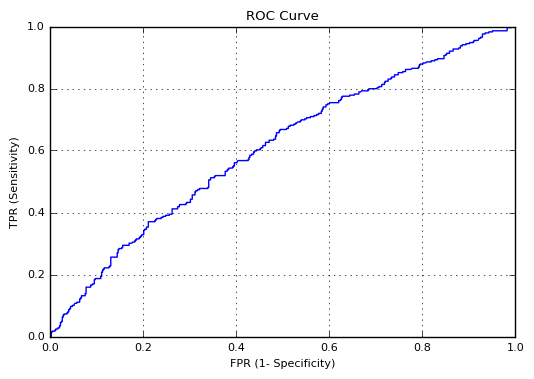

In [40]:
plt.plot(fpr,tpr)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.rcParams['font.size']= 8
plt.title('ROC Curve')
plt.xlabel('FPR (1- Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.grid(True)
plt.show()

In [38]:
def evaluate_threshold(threshold):
    print('TPR:' , tpr[thresholds > threshold][-1])
    print('FPR:' , tpr[thresholds > threshold][-1])

In [39]:
for i in np.arange(min(thresholds),max(thresholds),0.5):
    print('Threshold: '),i
    evaluate_threshold(i)
    print

Threshold:  -2.14973912147
('TPR:', 1.0)
('FPR:', 1.0)

Threshold:  -1.64973912147
('TPR:', 0.98615916955017302)
('FPR:', 0.98615916955017302)

Threshold:  -1.14973912147
('TPR:', 0.88581314878892736)
('FPR:', 0.88581314878892736)

Threshold:  -0.649739121475
('TPR:', 0.63321799307958482)
('FPR:', 0.63321799307958482)

Threshold:  -0.149739121475
('TPR:', 0.2837370242214533)
('FPR:', 0.2837370242214533)

Threshold:  0.350260878525
('TPR:', 0.034602076124567477)
('FPR:', 0.034602076124567477)

Threshold:  0.850260878525
('TPR:', 0.0)
('FPR:', 0.0)

Threshold:  1.35026087853
('TPR:', 0.0)
('FPR:', 0.0)

